In today's hands on technique, we will show how to transform a data from GIS polygon into the network in Python. We will
only use python to conduct this process. 

I will use the river network of Oregon as an example. You can download the streams network from US National WEATHER SERVICE

https://www.weather.gov/gis/Rivers

In [1]:
import geopandas as gpd
import networkx as nx
import matplotlib.pyplot as plt
import momepy

/opt/homebrew/Caskroom/miniconda/base/envs/CIE500/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


<Axes: >

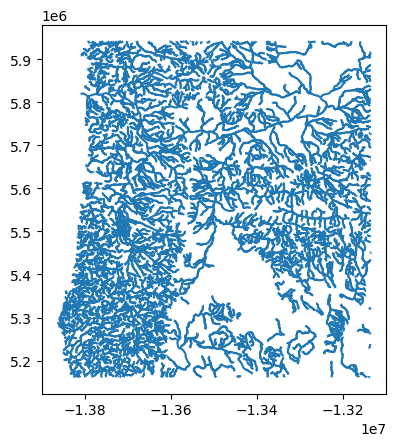

In [21]:
network_gpd = gpd.read_file("/Users/xudongfan/Documents/Courses/CIE500-UrbanNetworks/CIE500_XF/week5/rivernetwork/networkoregon.shp").explode(
            ignore_index=True, index_parts=False
        )[["geometry"]] #explod here means we break multilines in GIS into multiple simple lines. 


network_gpd['length'] = network_gpd.geometry.length
network_gpd.plot()

In [22]:
network_gpd.head()

,geometry,length
0,"LINESTRING (-13716765.459 5942097.011, -137165...",722.385184
1,"LINESTRING (-13719166.551 5941635.891, -137192...",501.807808
2,"LINESTRING (-13719166.551 5941635.891, -137188...",2946.625204
3,"LINESTRING (-13790745.752 5941063.217, -137905...",1142.273096
4,"LINESTRING (-13423549.576 5940970.636, -134233...",1895.652662


We can use the package of momepy to convert geodatafram data into the network

In [24]:
G = momepy.gdf_to_nx(
network_gpd,
approach="primal",
multigraph=False,
directed=False,
length="length",
)
G.remove_edges_from(nx.selfloop_edges(G))

Now we can visualize the network by using the matplotlib. By default, the node name is its coordinate. 

In [25]:
print(list(G.edges(data=True))[0])

((-13716765.459003797, 5942097.011075931), (-13716099.16730765, 5942097.009665051), {'geometry': <LINESTRING (-13716765.459 5942097.011, -13716516.713 5941961.525, -13716282...>, 'length': 722.3851838606352})


In [26]:
print(list(G.nodes(data=True))[0])

((-13716765.459003797, 5942097.011075931), {'x': -13716765.459003797, 'y': 5942097.011075931})


In [12]:
pos = {node: node for node in list(G.nodes())}

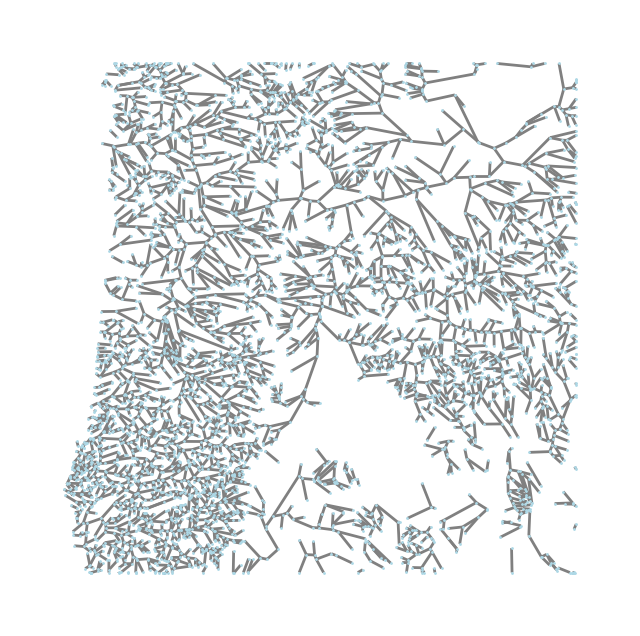

In [15]:
fig, ax = plt.subplots(figsize=(8, 8))
nx.draw_networkx(
    G,
    pos=pos,
    width=2,
    with_labels=False,
    node_color="lightblue",
    edge_color="gray",
    node_size=1,
)
ax.axis("off")  # remove the frame of the generated figure
plt.show()

We modeled the river network as an indirect network. However, the direction of water flow is usually determined. One way
to figure the flow direction is based on the node's elevation data. But we will not go to that detail in this class. 

We will perform some statistical analysis for this given network.

In [20]:
n = len(G.nodes())
m = len(G.edges())
k = 2*m / n
clust = nx.average_clustering(G)
assort_co = nx.degree_assortativity_coefficient(G)
print( n, m, k, clust, assort_co, sep='\n')

4121
3947
1.9155544770686725
0.00040443258108873245
-0.2740630837549911
